## PS3

In problem set 1, we illustrated how to perform integration using Monte Carlo Methods. We also showed how to smooth out the function involving sharp peaks by utilizing a predefined weight function to decrease the standard deviation.
In this notebook, we are trying to minimize the variance of the integration further by dividing the integration domain into 10 equal pieces and perform integration for each interval seperately.

To illustrate the idea, we used the following integral

$$\int_{2}^{10}(x-5)\cdot e^{-(\frac{x}{2}-3)}dx$$

For each interval we used linear weight functions ${w_1,w_2,..,w_{10}}$ where $w_i$ is the weight function for i'th interval. We also have the following normalization,

$$\int_{x_{i-1}}^{x_i} w_i(x)dx=1$$ and following boundary conditions,

$$w(x_{i-1})=f(x_{i-1})\text{ }\text{ and }\text{ } w(x_{i})=f(x_{i}) $$


Then the final integral can be calculated as

$$I_{Total}=\sum_{i=1}^{10} I_i$$
where 
$$I_i=\int_{x_{i-1}}^{x_i} f(x)dx$$

and this integral is to be calculated using our standard MC integration method using $w_i(x)$ as the weight function.




Following code snippet illustrates the described method.

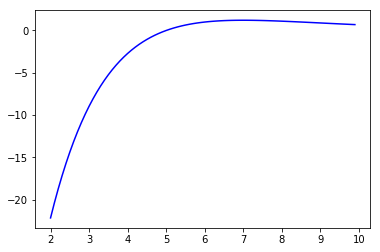

In [64]:
import numpy as np
from numpy.polynomial import Polynomial as P
#import plotly
#import plotly.plotly as py
#import plotly.figure_factory as ff
import matplotlib.pyplot as plt
#Integrand function
H=0
def f(x,H):
    return (x-5)*np.exp(-(x/2-3))+H

x = np.arange(2, 10, 00.1);
plt.plot(x,f(x,H),'b')
plt.show()

Following function returns the coefficients of weight function.

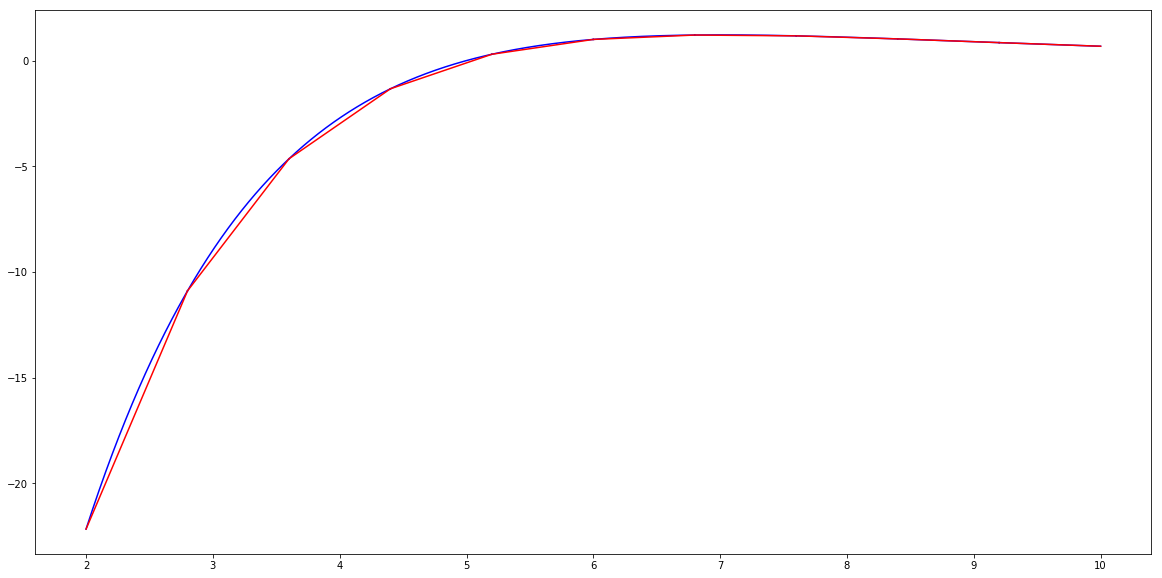

In [65]:
#Calculates the coefficients of linear weight function.    
def findw(f,H,lower,upper,normalize):
    #Find the linear function.
    slope=(f(upper,H)-f(lower,H))/(upper-lower)
    a=slope
    b=-slope*upper+f(upper,H)
    #Normalization.
    A=(a/2)*(upper**2)+b*upper-(a/2)*(lower**2)-b*lower
    if normalize:
        a/=A
        b/=A
    return [a,b]

y=np.arange(2,10.01,0.8)
plt.figure(figsize=(20,10))     
for i in range(0,len(y)-1):
    x = np.arange(y[i], y[i+1], 0.001);
    plt.plot(x,f(x,H),'-b')
    testW=findw(f,H,y[i],y[i+1],False)
    plt.plot(x,testW[0]*x+testW[1],'-r')
    
plt.show()

If we normalize the weight function, f/w in each segment looks like,

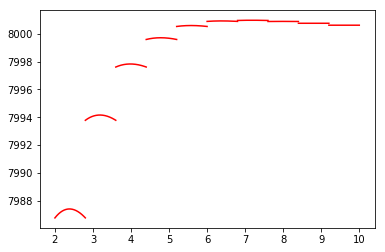

In [66]:
y=np.arange(2,10.01,0.8)
#plt.figure(figsize=(20,10))     
for i in range(0,len(y)-1):
    x = np.arange(y[i], y[i+1], 0.001);
    #plt.plot(x,f(x,H),'-b')
    testW=findw(f,10000,y[i],y[i+1],True)
    plt.plot(x,f(x,10000)/(testW[0]*x+testW[1]),'-r')
    
plt.show()

Following code is the implementation of described Monte Carlo method.

In [67]:
#Performs integration.
def integrate(f,lower,upper,N,C):
    H=C
    w=findw(f,H,lower,upper,True)    
    #Generate uniform random inputs.
    inputs=np.random.rand(N)    
    a=w[0]/2  
    b=w[1]
    c=-(a*lower**2+b*lower)
    
    SUM=0
    SUM2=0
    
    inverse_inputs=[]
    for i in inputs:
        p=[(-b-np.sqrt(b**2-4*a*(c-i)))/(2*a),(-b+np.sqrt(b**2-4*a*(c-i)))/(2*a)]
        if p[0]>=lower and p[0]<=upper:
            inverse_inputs.append(p[0])
        else :
            inverse_inputs.append(p[1])

    inverse_inputs=np.array(inverse_inputs)
    #Calculate f(inverse(x))/w(inverse(x)).
    outputsF=f(inverse_inputs,H)
    outputsW=w[0]*(inverse_inputs)+w[1]
    outputs=outputsF/outputsW
    SUM=outputs.sum()
    SUM2=(outputs*outputs).sum()
    var=SUM2/N-(SUM/N)**2
    var=var/N
    #Store generated points for variance calculation.
    Vsum=outputs.sum()
    return Vsum/N-H*(upper-lower),(upper-lower)**2*var
    

Let's run the code for $N=10^2,...,10^7$

100 -16.5210248475 0.151775152524 0.0445709800837 3.4052460197
1000 -16.7100820073 -0.037282007281 0.0192864344225 -1.93306893666
10000 -16.659319476 0.0134805240083 0.00594720629332 2.26669857131
100000 -16.6772295823 -0.00442958228842 0.00189981945585 -2.3315806535
1000000 -16.6731932654 -0.000393265436568 0.000598510928915 -0.657073108557
10000000 -16.6726793661 0.000120633892667 0.000188909093237 0.638581714621


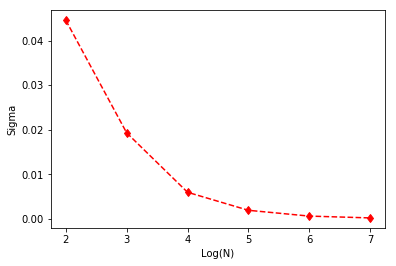

In [68]:
#Divide the region into 10 pieces.
l=np.arange(2,10.01,0.8)   
#Real value of the integral
I_real=-16.6728
#N values
N=[100,1000,10000,100000,1000000,10000000]
#Integration results.
results=[]
#Standart deviation values
sigmas=[]
for k in N:
    I=0
    sigma=0
    for i in range (0,len(l)-1):
        temp,temp2=integrate(f,l[i],l[i+1],int(0.1*k),100000)
        I+=temp
        sigma+=temp2
    results.append(I)
    sigmas.append(np.sqrt(sigma))
    print(k,I,I-I_real,np.sqrt(sigma),(I-I_real)/np.sqrt(sigma))
plt.plot(np.log10(N),sigmas,'rd--')
plt.ylabel('Sigma')
plt.xlabel('Log(N)')
plt.show()


In [69]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
data_matrix = [["N", "I MC", "I Real", "I MC-I Real","sigma","I MC-I Real/sigma"]]
for i in range (0,len(N)):
    element=[10*N[i], results[i], I_real,results[i]-I_real,sigmas[i],(results[i]-I_real)/sigmas[i]]
    data_matrix.append(element)
    
plotly.tools.set_credentials_file(username='guneykan', api_key='Yu3MsgD6Zlfbb0B3S5Mx')
table = ff.create_table(data_matrix)
py.iplot(table)

Let's run the program 100 times and look  how $\sigma$ is distrubuted for different execution of the program for $N=10000$.

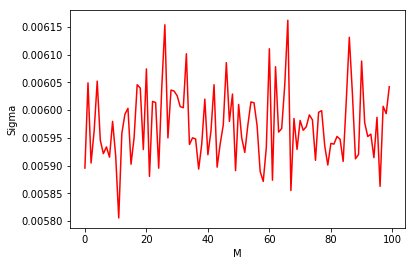

Sigma of sigma= 6.65135611455e-05


In [70]:
sigmas=[]
sigma=0
I=0
for i in range(0,100):
    I=0
    sigma=0
    for i in range (0,len(l)-1):
        temp,temp2=integrate(f,l[i],l[i+1],1000,10000)
        sigma+=temp2
        I+=temp
    sigmas.append(np.sqrt(sigma))

plt.plot(np.arange(0,100,1),sigmas,'r')
plt.ylabel('Sigma')
plt.xlabel('M')
plt.show()
print("Sigma of sigma=",np.sqrt(np.var(sigmas)))